# Dissertation Survey Analysis

## Power Analysis

1. Define the Null Hypothesis ($H_0$) and Alternative Hypothesis ($H_a$):
    * $H_0$: The AI-generated music is indistinguishable from human-composed music (e.g., 50% of people believe it's human-composed).
    * $H_a$: The AI-generated music is distinguishable from human-composed music (e.g., significantly more or less than 50% believe it's human-composed).
2. Effect Size:
   * The effect size here would be the difference in proportions (by the 6-point Likert scale).
   * For example, we consider the AI successful if, instead of 50% (chance level), 60% or more respondents believe the music is human-composed. 
   * The effect size in this context is 0.1 (60% - 50%).
3. Significance Level ($\alpha$):
    * Commonly set at 0.05. This is the probability of rejecting the null hypothesis when it is actually true (Type I error).
4. Power (1 - $\beta$):
    * Typically set at 0.8 or 80%. This is the probability of correctly rejecting the null hypothesis when it's false (thus detecting an effect if there is one).
5. Sample Size:
    * 500 respondents.

In [1]:
!pip install -q -U statsmodels
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

alpha = 0.05  # Significance level
power = 0.8   # Desired power
p1 = 0.5      # Proportion under null hypothesis (50%)
p2 = 0.6      # Proportion under alternative hypothesis (60%)
effect_size = proportion_effectsize(p1, p2)  # Effect size

# Calculate required sample size
analysis = NormalIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1.0)
print(f"Required sample size: {sample_size}")

# Assess if current sample size is adequate
is_adequate = 500 >= sample_size
print(f"Is current sample size of 500 adequate? {'Yes' if is_adequate else 'No'}")

Required sample size: 387.1677468578107
Is current sample size of 500 adequate? Yes


DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


## Survey Results ($n = 500$)

**Think human:**
   * Q1. AI Sample #1 (model 2)  : 50.60%
   * Q2. AI Sample #2 (model 3)  : 54.60%
   * Q4. AI Sample #3 (model 13) : 48.20%
    
**Think AI:**
   * Q3. Human Sample #1.        : 51.20%
   * Q5. Human Sample #2.        : 29.60%
    
**Demographics:**
   * Music Teacher/professional  : 08.20% 
   * Music student               : 12.40%
   * Amateur musician            : 28.20%
   * Music listener/enjoyer      : 51.20%

###  Results per Question

| Question                 | #1 (AI) | #2 (AI) | #3 (Human) | #4 (AI) | #5 (Human) |
|--------------------------|---------|---------|------------|---------|------------|
| AI - Strongly believe    | 8.20    | 8.40    | 10.20      | 7.00    | 5.60       |
| AI - Mostly believe      | 21.80   | 17.80   | 21.40      | 22.20   | 11.00      |
| AI - Somewhat believe    | 19.40   | 19.20   | 19.60      | 22.60   | 13.00      |
| Human - Somewhat believe | 15.40   | 16.20   | 18.00      | 18.00   | 20.80      |
| Human - Mostly believe   | 27.00   | 26.00   | 20.60      | 23.00   | 29.40      |
| Human - Strongly believe | 8.20    | 12.40   | 10.20      | 7.20    | 20.20      |

In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

population = 500
dfs = pd.read_excel("Data/Survey/SurveyResults.xlsx", sheet_name=[f"Q{i}" for i in range(2, 8)])

results = pd.concat([dfs[f"Q{i}"].iloc[:, 1] for i in range(2, 7)], axis=1)
results.columns = [f"Q{i}" for i in range(1, 6)]
results = pd.concat([results, dfs["Q2"].iloc[:, 0]], axis=1)
results.rename(columns={results.columns[-1]: results.columns[-1][3:]}, inplace=True)
results.index = results.iloc[:, -1]
results.drop(columns=results.columns[-1], inplace=True)
results = results.iloc[1:, :] 
results

,Q1,Q2,Q3,Q4,Q5
Who do you believe composed the following audio sample?,,,,,
AI - Strongly believe,0.082,0.084,0.102,0.07,0.056
AI - Mostly believe,0.218,0.178,0.214,0.222,0.11
AI - Somewhat believe,0.194,0.192,0.196,0.226,0.13
Human - Somewhat believe,0.154,0.162,0.18,0.18,0.208
Human - Mostly believe,0.27,0.26,0.206,0.23,0.294
Human - Strongly believe,0.082,0.124,0.102,0.072,0.202


In [3]:
demographics = dfs["Q7"].iloc[:, 1]
demographics.index = dfs["Q7"].iloc[:, 0]
demographics = demographics.iloc[1:]
demographics = pd.concat([demographics, demographics.apply(lambda x: int(x * population))], axis=1)
demographics.columns = ["Percentage", "Count"]
demographics.index.name = "Musical Ability Level"
demographics

,Percentage,Count
Musical Ability Level,,
"Music Teacher/professional (classically trained, undergraduate degree or higher)",0.082,41
"Music student (college-level or equivalent experience, including AP)",0.124,62
"Amateur musician (hobbyist, some background in composition/theory)",0.282,141
Music listener/enjoyer (little or no experience),0.512,256


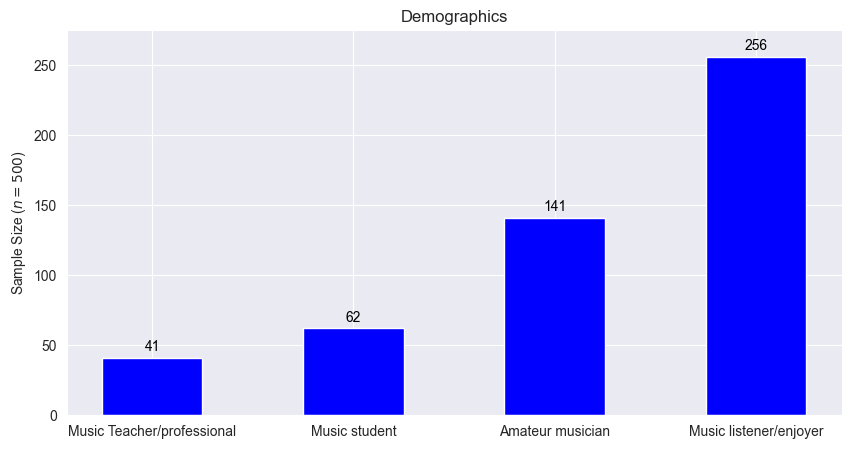

In [4]:
# Plot the demographic data
x_labels = ['Music Teacher/professional', 'Music student', 'Amateur musician', 'Music listener/enjoyer']
plt.figure(figsize=(10, 5)) 
plt.bar(x_labels, demographics['Count'], color='blue', width=0.5)
for i, v in enumerate(demographics['Count']):
    plt.text(i, v + 5, str(int(v)), color='black', ha='center')
plt.title("Demographics")
plt.ylabel("Sample Size ($n=500$)")
plt.ylim(0, 275)
plt.show()

## Chi-Square Analysis

Hyphothesis:
* $H_0$: There is no statistically significant difference between the frequency of respondents identifying a music piece as AI-generated and the frequency of respondents identifying it as human-composed.
* $H_a$: There is a statistically significant difference between the frequency of respondents identifying a music piece as AI-generated and the frequency of respondents identifying it as human-composed.

In other words,
* $H_0$: Any observed difference in the identification of AI and human compositions is due to random chance or sampling variability.
* $H_a$: The pattern of responses is not what would be expected by random chance alone.

In [5]:
from scipy.stats import chi2_contingency

# Convert percentages to counts for the binary outcome
results_counts = results.apply(lambda x: x * population)

# For "Think AI",    sum the counts of "AI - Strongly believe", "Mostly believe", and "Somewhat believe"
# For "Think human", sum the counts of "Human - Somewhat believe", "Mostly believe", and "Strongly believe"
binary_outcomes = pd.DataFrame({
    'Think AI': results_counts.iloc[0:3].sum(),     # Sum the first three rows for AI beliefs
    'Think Human': results_counts.iloc[3:6].sum()   # Sum the next three rows for Human beliefs
})

# Calculate the 'Think human' counts for each question
think_human_counts = binary_outcomes['Think Human']

# Expected count for "Think human" and "Think AI" if there was a 50-50 chance (null hypothesis)
expected_count = population / 2
chi2_results = {}
for q in [f"Q{i}" for i in range(1, 6)]:
    think_human_count = think_human_counts[q]
    think_ai_count = population - think_human_count
    
    observed_values = np.array([
        [think_human_count, think_ai_count],  # Observed counts
        [expected_count, expected_count]      # Expected counts if guesses were random
    ])
    
    chi2_stat, p_val, dof, ex = chi2_contingency(observed_values, correction=False)
    reject_H0 = p_val < 0.05

    chi2_results[q] = {
        'Chi-Square statistic': chi2_stat,
        'p-value': p_val,
        'Reject null hypothesis': reject_H0,
        'Degrees of freedom': dof,
        'Expected values': ex
    }

# Here, failing to reject the null hypothesis implies that respondents could not reliably distinguish between AI and human-composed music (our intended result).
chi2_results_df = pd.DataFrame(chi2_results).T
chi2_results_df.index.name = "Question"
chi2_results_df

,Chi-Square statistic,p-value,Reject null hypothesis,Degrees of freedom,Expected values
Question,,,,,
Q1,0.036001,0.849513,False,1,"[[251.5, 248.5], [251.5, 248.5]]"
Q2,2.120487,0.14534,False,1,"[[261.5, 238.5], [261.5, 238.5]]"
Q3,0.144021,0.704316,False,1,"[[247.0, 253.0], [247.0, 253.0]]"
Q4,0.324105,0.569151,False,1,"[[245.5, 254.5], [245.5, 254.5]]"
Q5,43.423096,0.0,True,1,"[[301.0, 199.0], [301.0, 199.0]]"


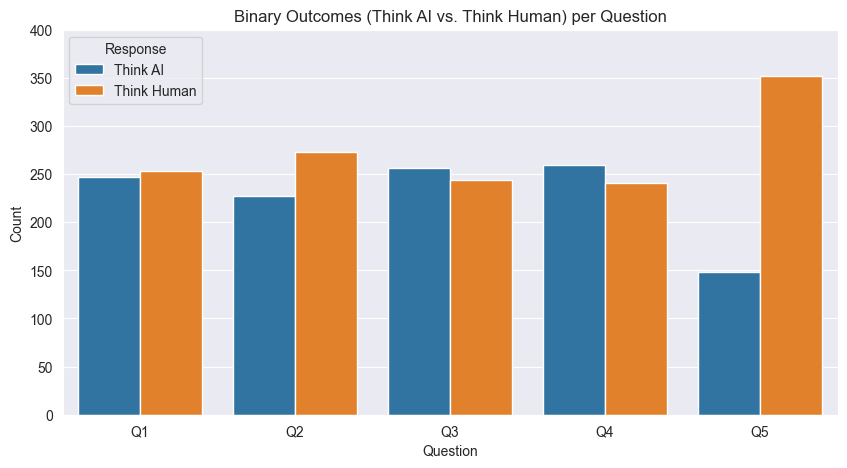

In [6]:
# Reformat the data for plotting as sns.countplot() requires
binary_outcomes_df = binary_outcomes.reset_index()
binary_outcomes_df = pd.melt(binary_outcomes_df, id_vars='index', value_vars=['Think AI', 'Think Human'])
binary_outcomes_df.columns = ['Question', 'Response', 'Count']

plt.figure(figsize=(10, 5))
sns.barplot(x='Question', y='Count', hue='Response', data=binary_outcomes_df)
plt.title("Binary Outcomes (Think AI vs. Think Human) per Question")
plt.ylabel("Count")
plt.ylim(0, 400)
plt.show()

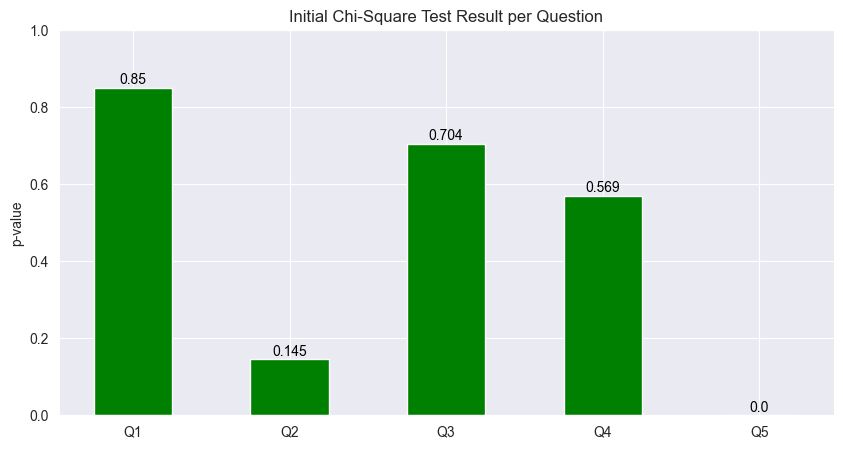

In [7]:
plt.figure(figsize=(10, 5))
plt.bar(chi2_results_df.index, chi2_results_df['p-value'], color='green', width=0.5)
for i, v in enumerate(chi2_results_df['p-value']):
    plt.text(i, v + 0.01, str(round(v, 3)), color='black', ha='center')
plt.title("Initial Chi-Square Test Result per Question")
plt.ylabel("p-value")
plt.ylim(0, 1)
plt.show()

## Kruskal-Wallis Test

Hyphothesis:
* $H_0$: The distribution of responses (AI or Human) is the same across different levels of musical ability. In other words, the median response is equal across all groups.
* $H_a$: There is a difference in the distribution of responses among at least one of the levels of musical ability.

In other words,
* $H_0$: The level of musical ability does not affect the ability to correctly identify AI-generated versus human-composed music.
* $H_a$: At least one group’s ability to identify AI-generated versus human-composed music is statistically different from the others.

In [8]:
# Pull the individual questions from the "Individuals Coded" sheet
individuals_coded = pd.read_excel("Data/Survey/SurveyResults.xlsx", sheet_name="Individuals Coded", index_col=0)
individuals_coded.drop(columns=individuals_coded.columns[0:2], inplace=True)
individuals_coded.drop(columns=individuals_coded.columns[-7:], inplace=True)
individuals_coded.columns = [f"Q{i}" for i in range(1, len(individuals_coded.columns) + 1)]
individuals_coded.rename(columns={individuals_coded.columns[-1]: "Demographic"}, inplace=True)

sample_codes = {
    "1": "AI - Strongly believe",
    "2": "AI - Mostly believe",
    "3": "AI - Somewhat believe",
    "4": "Human - Somewhat believe",
    "5": "Human - Mostly believe",
    "6": "Human - Strongly believe"
}		

demographic_codes = {
    "1": "Music Teacher/professional",
    "2": "Music student",
    "3": "Amateur musician",
    "4": "Music listener/enjoyer"    
}

individuals_coded

,Q1,Q2,Q3,Q4,Q5,Demographic
ID,,,,,,
-499838105,2,1,1,5,5,4
-420969952,2,2,5,5,5,4
1053933326,4,5,6,3,5,4
-1235923469,4,5,2,5,5,4
-1928203393,5,2,5,1,6,3
...,...,...,...,...,...,...
-1960238835,1,4,3,2,5,3
-750259040,4,3,4,3,3,4
598529083,6,4,3,5,6,4


In [9]:
# Convert the dataframe to be binary coded for the sample questions
# 1 = Think AI, 0 = Think Human
binary_coded = individuals_coded.copy()
for i in range(0, len(binary_coded.columns) - 1):
    binary_coded.iloc[:, i] = binary_coded.iloc[:, i].apply(lambda x: 1 if str(x) in ["1", "2", "3"] else 0)
binary_coded = binary_coded.apply(pd.to_numeric)
binary_coded

,Q1,Q2,Q3,Q4,Q5,Demographic
ID,,,,,,
-499838105,1,1,1,0,0,4
-420969952,1,1,0,0,0,4
1053933326,0,0,0,1,0,4
-1235923469,0,0,1,0,0,4
-1928203393,0,1,0,1,0,3
...,...,...,...,...,...,...
-1960238835,1,0,1,1,0,3
-750259040,0,1,0,1,1,4
598529083,0,0,1,0,0,4


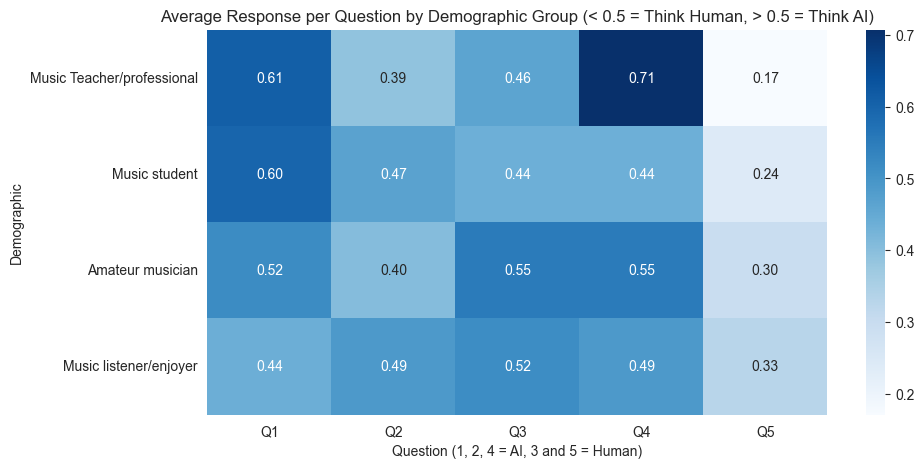

In [10]:
plt.figure(figsize=(10, 5))
sns.heatmap(binary_coded.groupby('Demographic').mean(), annot=True, cmap='Blues', fmt='.2f')
plt.title("Average Response per Question by Demographic Group (< 0.5 = Think Human, > 0.5 = Think AI)")
plt.yticks(np.arange(0.5, len(demographic_codes.keys()), 1), demographic_codes.values(), rotation=0)
plt.xlabel("Question (1, 2, 4 = AI, 3 and 5 = Human)")
plt.show()

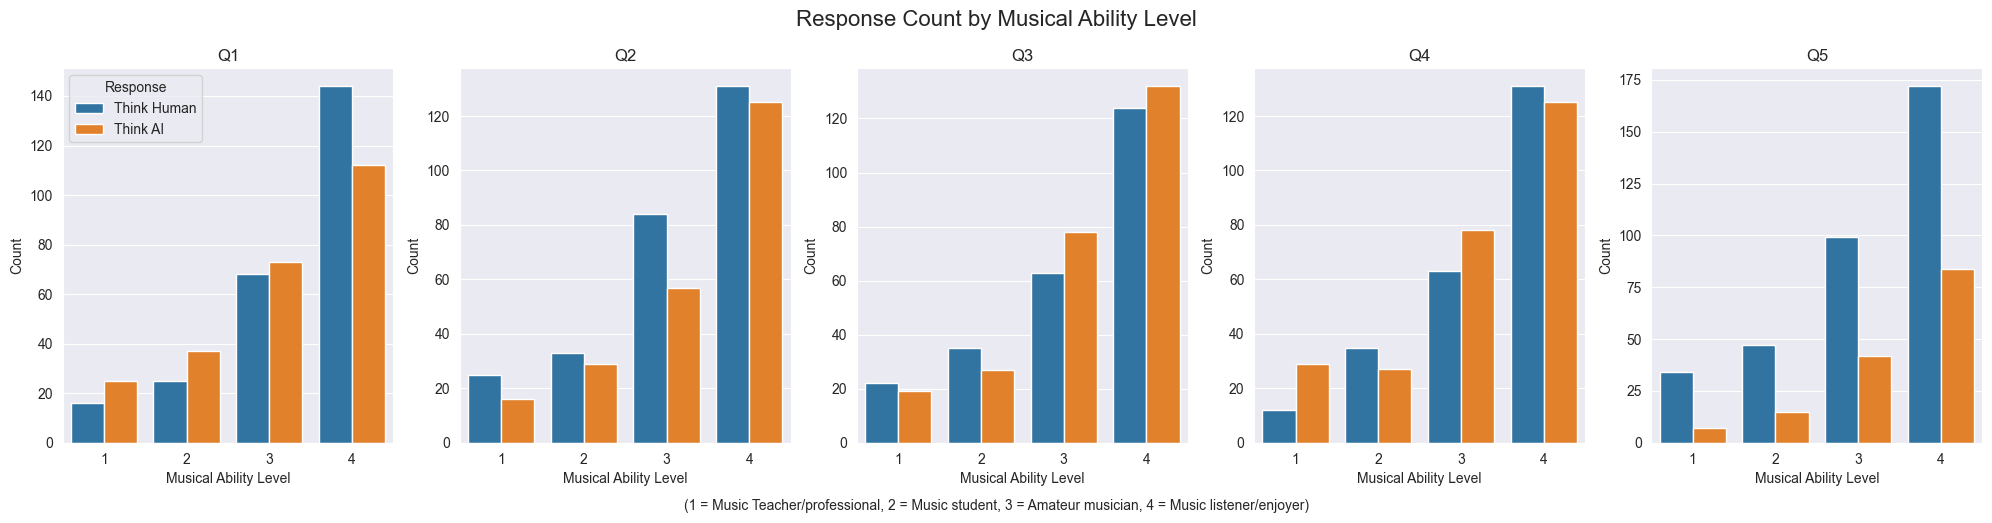

In [11]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle("Response Count by Musical Ability Level", fontsize=16)
for i, q in enumerate([f"Q{i}" for i in range(1, 6)]):
    sns.countplot(ax=axes[i], x='Demographic', hue=q, data=binary_coded)
    axes[i].set_title(f"{q}")
    axes[i].set_xticks(np.arange(0, len(demographic_codes.keys()), 1))
    axes[i].set_xticklabels(demographic_codes.keys(), rotation=0)
    axes[i].set_xlabel("Musical Ability Level")
    axes[i].set_ylabel("Count")
    if i != 0:
        axes[i].get_legend().remove()
    else:
        axes[i].legend(title="Response")
        handles, labels = axes[i].get_legend_handles_labels()
        axes[i].legend(handles=handles, labels=['Think Human', 'Think AI'], title="Response")
fig.tight_layout(pad=1.0)
fig.text(0.5, -0.02, "(1 = Music Teacher/professional, 2 = Music student, 3 = Amateur musician, 4 = Music listener/enjoyer)", ha='center')
plt.show()

In [12]:
from scipy.stats import kruskal

results_kw = {}

for q in [f"Q{i}" for i in range(1, 6)]:
    # Split the data into groups by demographic
    groups = [binary_coded[binary_coded['Demographic'] == int(code)][q] for code in demographic_codes.keys()]
    stat, p = kruskal(*groups)
    reject_H0 = p < 0.05
    results_kw[q] = {
        'Kruskal-Wallis Statistic': stat, 
        'p-value': p,
        'Reject null hypothesis': reject_H0,
    }

results_kw_df = pd.DataFrame(results_kw).T
results_kw_df.index.name = "Question"
results_kw_df

,Kruskal-Wallis Statistic,p-value,Reject null hypothesis
Question,,,
Q1,8.387896,0.03864,True
Q2,3.334107,0.342924,False
Q3,2.805512,0.422593,False
Q4,9.162945,0.027201,True
Q5,5.216878,0.156588,False


### Kruskal-Wallis Initial Results

**Q1 and Q4: Reject Null Hypothesis**
 * This implies there is a statistically significant difference in how respondents from different demographic groups perceived the music.
 * In other words, the level of musical ability appears to influence respondents' ability to distinguish between AI and human compositions for these particular music samples.

**Q2, Q3, and Q5: Fail to Reject Null Hypothesis**
 * This suggests that there is no significant difference across the demographic groups in terms of their perceptions of these music samples.
 * The ability to identify these pieces as AI or human-composed does not seem to be significantly influenced by the respondents' level of musical ability.

#### Implications
 * **Variation in Perception by Demographics**: The results for Q1 and Q4 indicate that musical background may play a role in how certain pieces of music are perceived.
 * **Consistency Across Groups**: The results for Q2, Q3, and Q5 suggest a consistency in perception across different levels of musical experience, indicating that these pieces might have qualities that make them uniformly identifiable (or unidentifiable) as AI or human compositions.

## Post-Hoc Analysis

Since the data has insufficient variability and/or size to perform Dunn's test, we will instead use a Chi-Square Test on the larger samples and a Fisher's Exact Test on the smaller samples.


### Chi-Square Test of Independence (Larger Groups)
Hyphothesis:
* $H_0$: The distribution of responses (AI or Human) is the same across the demographic groups being compared.
* $H_a$: The distribution of responses differs significantly across the demographic groups.

In other words,
* $H_0$: There is no significant association between the demographic groups and the belief about the music's origin (AI or Human).
* $H_a$: There is a suggested association between the demographic groups and the belief about the music's origin.


### Fisher's Exact Test (Smaller Groups)
Hyphothesis:
* $H_0$: There is no significant association between the demographic groups and the belief about whether the music is AI or human-composed.
* $H_a$: There is a significant association between the demographic groups and the belief about the music's origin.

In other words,
* $H_0$: The proportions of responses are similar across the groups being compared.
* $H_a$: The proportions of responses differ between the groups.

In [13]:
!pip install -q scikit-posthocs
import scikit_posthocs as sp

for question in ['Q1', 'Q4']:  # Questions where Kruskal-Wallis test was significant
    data_for_test = binary_coded[[question, 'Demographic']].copy()
    data_for_test['Demographic'] = data_for_test['Demographic'].map(demographic_codes)

    # Check group sizes and variability
    valid_groups = []
    for group_name, group_data in data_for_test.groupby('Demographic'):
        if len(group_data) > 1 and group_data[question].nunique() > 1:
            valid_groups.append(group_name)

    # Perform Dunn's test if valid groups are found
    if len(valid_groups) > 1:
        filtered_data = data_for_test[data_for_test['Demographic'].isin(valid_groups)]
        dunn_test_result = sp.posthoc_dunn(filtered_data, val_col=question, group_col='Demographic', p_adjust='bonferroni')
        print(f"Post-hoc comparisons for {question}:\n{dunn_test_result}\n")
    else:
        print(f"Insufficient data or variability for Dunn's test on {question}.")

Insufficient data or variability for Dunn's test on Q1.
Insufficient data or variability for Dunn's test on Q4.


DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [14]:
from scipy.stats import chi2_contingency

# Assuming the larger groups are 'Amateur musician' (code 3) and 'Music listener/enjoyer' (code 4)
chi2_posthoc_results = {}
for question in ['Q1', 'Q4']:
    contingency_table = pd.crosstab(
        binary_coded[binary_coded['Demographic'].isin([3, 4])]['Demographic'],
        binary_coded[question]
    )
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    reject_H0 = p < 0.05
    chi2_posthoc_results[question] = {
        'Chi-Square statistic': chi2,
        'p-value': p,
        'Reject null hypothesis': reject_H0,
        'Degrees of freedom': dof,
        'Expected values': ex
    }

chi2_posthoc_results_df = pd.DataFrame(chi2_posthoc_results).T
chi2_posthoc_results_df.index.name = "Question"
chi2_posthoc_results_df

,Chi-Square statistic,p-value,Reject null hypothesis,Degrees of freedom,Expected values
Question,,,,,
Q1,2.040548,0.153154,False,1,"[[75.29471032745592, 65.70528967254408], [136...."
Q4,1.284357,0.25709,False,1,"[[68.90176322418137, 72.09823677581863], [125...."


In [15]:
from scipy.stats import fisher_exact

# Assuming the smaller groups are 'Music Teacher/professional' (code 1) and 'Music student' (code 2)
fisher_exact_results = {}
for question in ['Q1', 'Q4']:
    for group1 in [1, 2]:
        for group2 in [1, 2]:
            if group1 != group2:
                table = pd.crosstab(
                    binary_coded[binary_coded['Demographic'].isin([group1, group2])]['Demographic'],
                    binary_coded[question]
                )
                oddsratio, p_value = fisher_exact(table)
                reject_H0 = p_value < 0.05
                fisher_exact_results[f"{question} - {group1} vs. {group2}"] = {
                    'Odds ratio': oddsratio,
                    'p-value': p_value,
                    'Reject null hypothesis': reject_H0,
                }

fisher_exact_results_df = pd.DataFrame(fisher_exact_results).T
fisher_exact_results_df.index.name = "Comparison"
fisher_exact_results_df

,Odds ratio,p-value,Reject null hypothesis
Comparison,,,
Q1 - 1 vs. 2,0.9472,1.0,False
Q1 - 2 vs. 1,0.9472,1.0,False
Q4 - 1 vs. 2,0.319212,0.008658,True
Q4 - 2 vs. 1,0.319212,0.008658,True


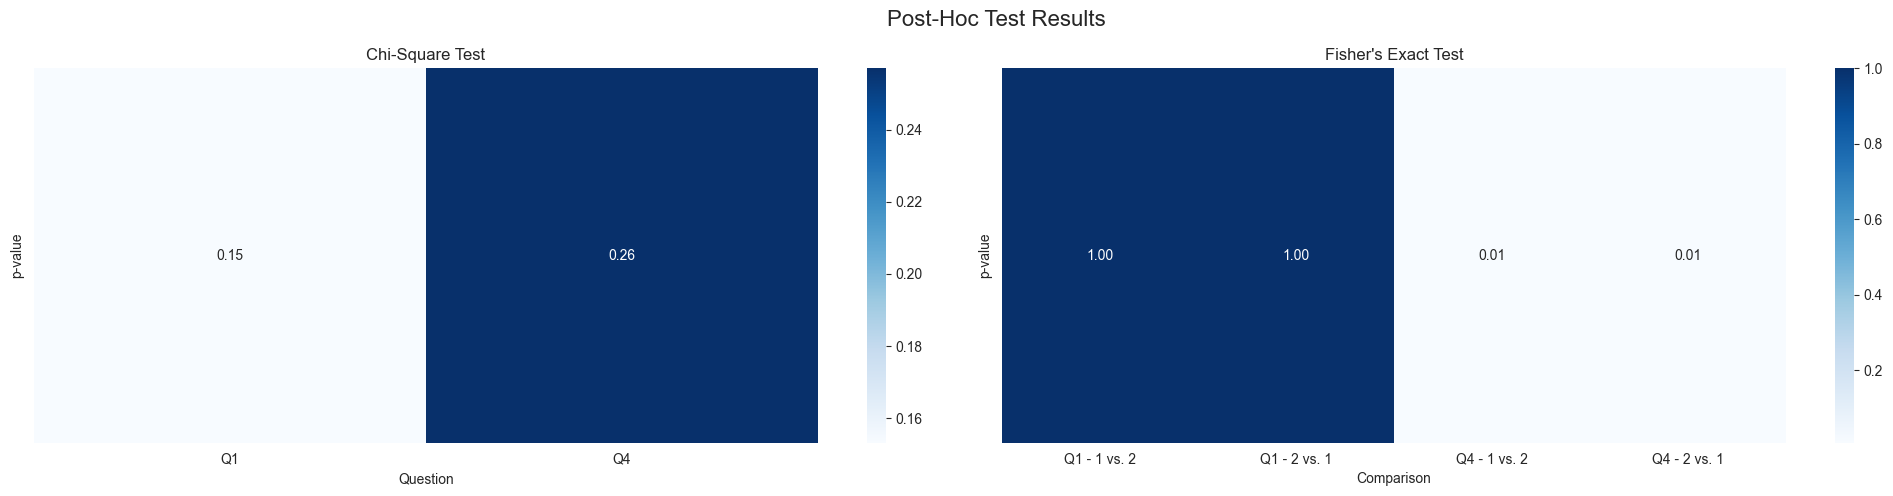

In [16]:
chi2_posthoc_results_df['p-value'] = pd.to_numeric(chi2_posthoc_results_df['p-value'], errors='coerce')
fisher_exact_results_df['p-value'] = pd.to_numeric(fisher_exact_results_df['p-value'], errors='coerce')

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle("Post-Hoc Test Results", fontsize=16)
sns.heatmap(chi2_posthoc_results_df[['p-value']].T, annot=True, cmap='Blues', fmt='.2f', ax=axes[0])
axes[0].set_title("Chi-Square Test")
sns.heatmap(fisher_exact_results_df[['p-value']].T, annot=True, cmap='Blues', fmt='.2f', ax=axes[1])
axes[1].set_title("Fisher's Exact Test")
fig.tight_layout(pad=1.0)
plt.show()

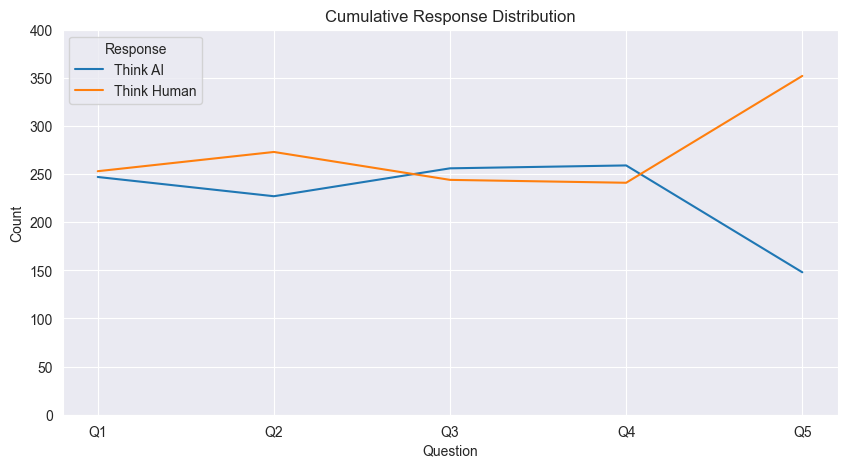

In [17]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=binary_outcomes_df, x='Question', y='Count', hue='Response')
plt.title("Cumulative Response Distribution")
plt.ylabel("Count")
plt.ylim(0, 400)
plt.show()

In [18]:
from statsmodels.stats.proportion import proportion_confint

# Confidence intervals for the proportions of responses in each demographic group
confidence_intervals = {}
for q in [f"Q{i}" for i in range(1, 6)]:
    for group in demographic_codes.keys():
        group_count = binary_coded[binary_coded['Demographic'] == int(group)][q].sum()
        group_size = len(binary_coded[binary_coded['Demographic'] == int(group)][q])
        ci = proportion_confint(group_count, group_size, alpha=0.05, method='normal')
        confidence_intervals[f"{q} - {group}"] = {
            'Lower': ci[0],
            'Upper': ci[1]
        }
        
confidence_intervals_df = pd.DataFrame(confidence_intervals).T
confidence_intervals_df.index.name = "Comparison"
confidence_intervals_df

,Lower,Upper
Comparison,,
Q1 - 1,0.460441,0.759071
Q1 - 2,0.474670,0.718879
Q1 - 3,0.435253,0.600208
Q1 - 4,0.376732,0.498268
Q2 - 1,0.240929,0.539559
Q2 - 2,0.343543,0.591940
Q2 - 3,0.323253,0.485257
Q2 - 4,0.427049,0.549513
Q3 - 1,0.310777,0.616052


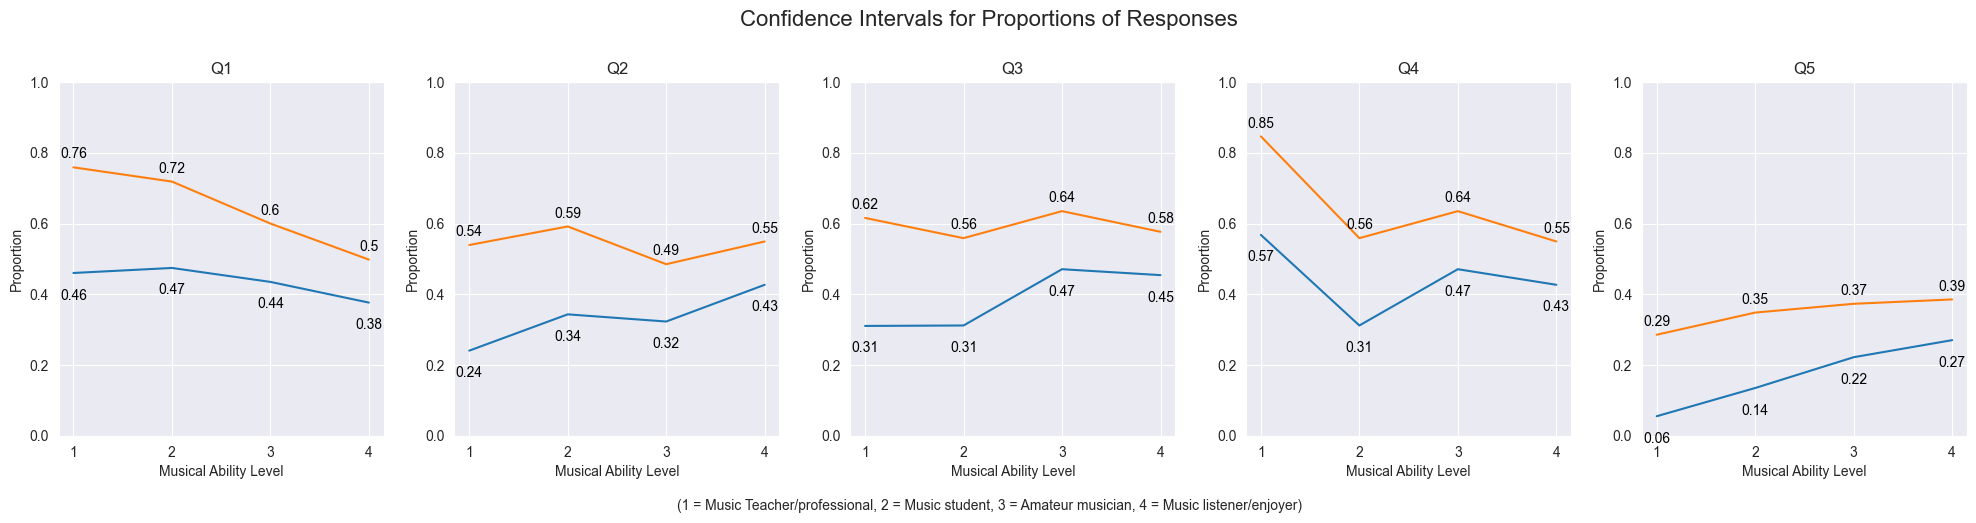

In [19]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle("Confidence Intervals for Proportions of Responses", fontsize=16)
for i, q in enumerate([f"Q{i}" for i in range(1, 6)]):
    sns.lineplot(ax=axes[i], data=confidence_intervals_df[confidence_intervals_df.index.str.contains(q)], x='Comparison', y='Lower')
    sns.lineplot(ax=axes[i], data=confidence_intervals_df[confidence_intervals_df.index.str.contains(q)], x='Comparison', y='Upper')
    axes[i].set_title(f"{q}")
    axes[i].set_xticks(np.arange(0, len(demographic_codes.keys()), 1))
    axes[i].set_xticklabels(demographic_codes.keys(), rotation=0)
    axes[i].set_xlabel("Musical Ability Level")
    axes[i].set_ylabel("Proportion")
    axes[i].set_ylim(0, 1)
    for j, v in enumerate(confidence_intervals_df[confidence_intervals_df.index.str.contains(q)]['Lower']):
        axes[i].text(j, v - 0.075, str(round(v, 2)), color='black', ha='center')
    for j, v in enumerate(confidence_intervals_df[confidence_intervals_df.index.str.contains(q)]['Upper']):
        axes[i].text(j, v + 0.025, str(round(v, 2)), color='black', ha='center')
fig.tight_layout(pad=1.5)
fig.text(0.5, -0.02, "(1 = Music Teacher/professional, 2 = Music student, 3 = Amateur musician, 4 = Music listener/enjoyer)", ha='center')
plt.show()

### Post-Hoc Results

#### Chi-Square Test

**Interpretation**:
 * **No Significant Difference in Perception**: The results suggest that there is no statistically significant difference in the way the larger demographic groups (e.g., "Music listener/enjoyer" and "Amateur musician") perceived the music as AI or human-composed for Q1 and Q4. 
    * This implies that their ability to identify whether the music was AI-generated or human-composed was similar across these groups.
 * **Consistency Across Groups**: The lack of significant differences indicates a consistency in perception across the largest demographic groups for these particular pieces of music.

**Implications**:
 * **AI Model Performance**: Since there was no significant difference in perception across the demographic groups for Q1 and Q4, this aligns with the overall finding that listeners, regardless of their musical background, found it challenging to distinguish between AI-generated and human-composed music. 
    * This supports the success of the AI models in creating music that is not easily distinguishable from human compositions.
 
 * **General Audience Perception**: The results particularly highlight that the general audience (music listeners/enjoyers) did not perceive the music differently from other more musically trained groups, suggesting that the AI's output was uniformly convincing or ambiguous.


#### Fisher's Exact Test

**Q1 Results**:
 * Groups 1 and 2 (Music Teacher/professional and Music student):
    * The p-values are 1.0 for both comparisons. 
    * This indicates that there is no statistically significant association between these demographic groups and their beliefs about whether Q1 was AI or human-composed. 
    * Essentially, both groups responded similarly to Q1.

**Q4 Results**:
 * Groups 1 and 2 (Music Teacher/professional and Music student):
    * The p-values are approximately 0.00866 for both comparisons.
    * This is below the typical alpha level of 0.05, suggesting that there is a statistically significant difference in how these two groups perceived the music sample in Q4.
    * In other words, the ability to identify Q4 as AI-generated or human-composed seems to differ significantly between these two groups.

**Interpretation and Implications**:
 * **Q1 (General Agreement)**: The lack of a significant difference in Q1 implies that both music teachers/professionals and music students had similar difficulty (or ease) in identifying the music's origin.
   * This might suggest that Q1's composition was such that it equally challenged or fooled both groups.

 * **Q4 (Significant Difference)**: The significant difference observed in Q4 suggests that one group was better able to distinguish the origin of the music than the other. 
   * This could be due to the specific characteristics of the music sample in Q4, which may have been more easily identifiable as AI or human-composed by one group over the other.


## Summary of Statistical Analyses and Findings

1. **Kruskal-Wallis Test**: The initial Kruskal-Wallis tests were conducted to assess if there were differences in perceptions of AI-generated versus human-composed music across various demographic groups based on their musical ability. The tests revealed significant differences in perception for certain music samples (notably Q1 and Q4, produced by the two weaker models), suggesting that listeners' abilities to distinguish between AI and human compositions varied based on their musical background and supporting the hypothesis that musical training influences music perception. Interestingly, the test did not reveal a significant difference across groups for Q3 (generated by the best AI model weights). This suggests a uniformly high level of realism in the AI's composition, as the model successfully blurs the lines between AI-generated and human-composed music for listeners across all levels of musical expertise.

2. **Chi-Square Tests**: Subsequent Chi-Square tests were performed for the larger demographic groups. These tests found no significant differences in the ability of these groups to differentiate between AI and human compositions for most of the samples, indicating a general uniformity in perception across these groups. This result suggested that for most music samples, the AI model successfully created compositions indistinguishable from human compositions for the general audience, aligning with the primary objective of the AI's performance.

3. **Post-Hoc Chi-Square and Fisher's Exact Tests**: To further explore the nuances in perception among different groups, post-hoc analyses were conducted. The Fisher's Exact tests, applied to the smaller demographic groups, revealed significant differences in perception for Q4 (produced by the worst of the three models), indicating distinct perceptual capabilities between groups like music teachers/professionals and music students. This highlighted that certain nuances in AI-generated music might be more discernible to those with specific types of musical training. However, this also contrasted with the findings for Q3, where such differences were not observed, underscoring the exceptional performance of the best AI model in mimicking human composition. 

4. **Overall Interpretation**: The collective findings from these statistical analyses provide a comprehensive understanding of the perception of AI-generated music. While the AI model demonstrated a high level of proficiency in creating compositions that were broadly indistinguishable from human compositions, particularly in Q3, there were instances (e.g., Q4) where specific listener groups with certain musical expertise could discern differences. These insights emphasize the sophistication of the AI model and its potential in the field of music composition while also highlighting the subtle yet impactful role of musical training in the perception of music.

### Analysis Conclusion

This analysis revealed that the AI model was generally successful in creating music that listeners, irrespective of their musical background, found challenging to distinguish from human compositions. The model successfully created pieces indistinguishable from human compositions, with the performance of the best model weights (in Q3) being particularly noteworthy. However, the experiment also brought to light the intricacies of musical perception, particularly among those with specialized training, offering a deeper understanding of the interplay between AI-generated art and human expertise. As such, this research contributes significantly to the fields of AI in creative arts and musicology, showcasing both the capabilities and limitations of current AI technology in music composition and the nuanced dynamics of music perception.

## Conclusions

The primary objective of this research was to assess the capability of a novel AI model to generate realistic four-part (SATB) choral music compositions that are indistinguishable from those composed by humans. The survey data, collected from a diverse range of respondents with varying levels of musical expertise, provided a rich dataset for evaluating this objective. The statistical analyses conducted — the Chi-Square, Kruskal-Wallis, and post-hoc tests — have yielded insightful results.

**Performance of the AI Model**: The findings from the Kruskal-Wallis tests, particularly for questions Q1 and Q4, indicated a significant difference in the perception of music samples across the larger demographic groups. However, the subsequent Chi-Square tests on these larger groups revealed no significant difference in the ability to distinguish between AI and human compositions. This suggests that, overall, the AI model successfully created music that was, to a large extent, indistinguishable from human compositions, meeting the primary goal of the AI's performance.

**Perception Across Musical Abilities**: The lack of significant differences in the Chi-Square tests for the larger demographic groups suggests a general consistency in how the music was perceived, regardless of the listeners' musical background. This consistency highlights the AI model's effectiveness in creating compositions that uniformly challenge or fool listeners across different levels of musical experience.

**Differences in Smaller Groups**: The Fisher's Exact tests conducted on the smaller demographic groups revealed a notable exception. Particularly for Q4, a significant difference was observed between music teachers/professionals and music students. This suggests that certain nuances in the AI-generated music might be more discernible to those with specific types of musical training or experience.

**Implications for AI in Music Composition**: The overall difficulty experienced by respondents across all levels of musical ability in distinguishing AI compositions from human ones is a testament to the sophistication and realism of the AI-generated music. This finding is particularly significant in the context of the evolving role of AI in creative fields like music composition. It underscores the potential of AI to not only assist in but also autonomously create compositions that resonate with a wide audience.

## Final Remarks

This research has demonstrated that the novel AI model used in this study is capable of generating music compositions that are broadly indistinguishable from those created by humans, as evidenced by the general inability of respondents from diverse musical backgrounds to reliably identify the origin of the compositions. The subtle differences observed in smaller, more specialized groups open avenues for further exploration into how AI can be fine-tuned to enhance its mimicry of human compositions or create distinctively AI-flavored music. These findings contribute valuable insights into the field of AI-generated classical music and pave the way for future research in this intersection of technology and art.